# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [2]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data   


Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [3]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE
class Node:
    def __init__(self, val):
        self.val = val
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def show(self):
        current = self.head
        while(current is not None):
            print(current.val)
            current = current.next    

Use the cell below to implement the requested API by means of **sequential search**.

In [4]:
class SequentialSearchSet(AbstractSet):
    
    def __init__(self):   
        self.set = []
        
    def insertElement(self, element):
        inserted = False
        if element not in self.set:
            self.set.append(element)
            inserted = True
        return inserted


    def searchElement(self, element):     
        return element in self.set

Use the cell below to implement the requested API by means of **binary search tree**.

In [5]:
class BSNode:
    def __init__(self, element):
        self.element = element
        self.left = None
        self.right = None

class BinarySearchTreeSet(AbstractSet):

    def __init__(self):
        self.root = None

    def insertElement(self, element):
        if self.root == None:
            self.root = BSNode(element)
            return True

        current = self.root
        while True:
            if element < current.element:
                if current.left is None:
                    current.left = BSNode(element)
                    return True
                else:
                    current = current.left
            elif element > current.element:
                if current.right is None:
                    current.right = BSNode(element)
                    return True
                else:
                    current = current.right
            else:
                return False

    def searchElement(self, element):
        if self.root == None:
            return False
        else:
            current = self.root
            while current is not None:
                if element == current.element:
                    return True
                elif element < current.element:
                    current = current.left
                else:
                    current = current.right
            return False

Use the cell below to implement the requested API by means of **balanced search tree**.

# Red Black Balanced Search Tree
-------------------------------------

The `RBTree` class provides an implementation of a Red Black tree with an `insert` method to add new nodes. The class also contains several helper methods to fix the tree if necessary after a new node is inserted.

The `insertElement` method works as follows:

1. If the tree is empty, the new node is inserted as the root and coloured black.
2. Otherwise, the tree is searched for the proper location to insert the new node, following the rules of a binary search tree.
3. After inserting the new node, the `_fix_tree` method is called to ensure that the Red Black tree properties are maintained.

The `_fix_tree` method is responsible for checking and correcting any violations of the Red Black tree properties. It follows a series of cases to determine what rotation(s) and colour changes, if any, are necessary to fix the tree.

The `_rotate_left` and `_rotate_right` methods are helper methods used by `_fix_tree` to perform left and right rotations, respectively, on the tree.

Together, these methods provide a working implementation of a Red Black tree with an insert method that maintains the Red Black tree properties.

In [6]:
RED = True
BLACK = False

# Node class
class RBNode: # DID NOT ADD TO MAIN NODE CLASS AS THIS REQUIRES MORE ATTRIBUTES
    def __init__(self, value, colour=RED):
        self.value = value
        self.colour = colour
        self.left = None # left child
        self.right = None # right child
        self.parent = None

    def __repr__(self):
        return f"{self.value}({self.colour})"

    def __iter__(self):
        if self.left:
            yield from self.left
        yield self.value
        if self.right:
            yield from self.right

    def grandparent(self):
        if self.parent:
            return self.parent.parent

    def uncle(self):
        if self.grandparent():
            if self.grandparent().left == self.parent:
                return self.grandparent().right
            else:
                return self.grandparent().left

    def sibling(self):
        if self.parent:
            if self.parent.left == self:
                return self.parent.right
            else:
                return self.parent.left


# Red Black Tree class
class BalancedSearchTreeSet(AbstractSet):
    
    def __init__(self):
        self.root = None

    def __repr__(self):
        return str([v for v in self])

    def __iter__(self):
        if self.root:
            yield from self.root

    def __contains__(self, value):
        if self.root is None:
            return False
        else:
            current = self.root
            while True:
                if value == current.value:
                    return True
                elif value < current.value:
                    if current.left is None:
                        return False
                    else:
                        current = current.left
                else:
                    if current.right is None:
                        return False
                    else:
                        current = current.right

        
    def insertElement(self, element):
        inserted = True

        node = RBNode(element)
        if self.root is None:
            self.root = node
            self.root.colour = BLACK
        else:
            current = self.root
            while True:
                if node.value < current.value:
                    if current.left is None:
                        current.left = node
                        node.parent = current
                        break
                    else:
                        current = current.left

                elif node.value == current.value:
                    inserted = False
                    break

                else:
                    if current.right is None:
                        current.right = node
                        node.parent = current
                        break
                    else:
                        current = current.right

            self._fixup(node)
        
        return inserted
    
    def _fixup(self, node : RBNode):
        # case 1: node is root
        if node.parent is None:
            node.colour = BLACK
            return

        # case 2: parent is black
        if node.parent.colour == BLACK:
            return

        # case 3: parent and uncle are red
        if node.uncle() and node.uncle().colour == RED:
            node.parent.colour = BLACK
            node.uncle().colour = BLACK
            node.grandparent().colour = RED
            self._fixup(node.grandparent())
            return

        # case 4: parent is red, uncle is black
        else:
            # case 4a: node is right child, parent is left child
            if node.parent.right == node and node.grandparent().left == node.parent:
                self._rotate_left(node.parent)
                node = node.left

            # case 4b: node is left child, parent is right child
            elif node.parent.left == node and node.grandparent().right == node.parent:
                self._rotate_right(node.parent)
                node = node.right

            # case 5: node is left child, parent is left child or node is right child, parent is right child
            node.parent.colour = BLACK
            node.grandparent().colour = RED
            if node.parent.left == node and node.grandparent().left == node.parent:
                self._rotate_right(node.grandparent())
            else:
                self._rotate_left(node.grandparent())


    def _rotate_left(self, node: RBNode):
        new_parent = node.right
        node.right = new_parent.left
        if new_parent.left:
            new_parent.left.parent = node
        new_parent.parent = node.parent
        if node.parent is None:
            self.root = new_parent
        elif node == node.parent.left:
            node.parent.left = new_parent
        else:
            node.parent.right = new_parent
        new_parent.left = node
        node.parent = new_parent

    def _rotate_right(self, node: RBNode):
        new_parent = node.left
        node.left = new_parent.right
        if new_parent.right:
            new_parent.right.parent = node
        new_parent.parent = node.parent
        if node.parent is None:
            self.root = new_parent
        elif node == node.parent.left:
            node.parent.left = new_parent
        else:
            node.parent.right = new_parent
        new_parent.right = node
        node.parent = new_parent

    def searchElement(self, element):     
        return element in self

Use the cell below to implement the requested API by means of **bloom filter**.

In [7]:
from bitarray import bitarray

# calculate natural logarithm
def ln(x):
    n = 1000.0
    return n * ((x ** (1/n)) - 1)

# get size of bitarray
def get_size(num_of_items, fp_prob):
        size = -(num_of_items * ln(fp_prob)) / (ln(2) ** 2)
        return int(size)

# get number of hash function to be used
def get_hash_num(bitarray_size, num_of_items):
    hash_num = (bitarray_size / num_of_items) * ln(2)
    return int(hash_num)

# Murmurhash3 32bits version
# reference: https://huagetai.github.io/posts/fcfde8ff/
def murmurhash_32(key, seed=0, blocksize=64):
    h = seed
    constant1 = 0xcc9e2d51
    constant2 = 0x1b873593
    r1 = 15
    r2 = 13
    m = 5
    n = 0xe6546b64
    bits_32 = 0xffffffff
    # Divide key into chunks of blocksize bits (default 64 bits) and iterate over each chunk
    for chunk in [key[i:i+blocksize//8] for i in range(0, len(key), blocksize//8)]:
        k = 0
        for i, c in enumerate(chunk):
            # Convert chunk into integer k by shifting bytes left by multiples of 8 bits
            k |= ord(c) << (8 * i)
        k *= constant1
        k &= bits_32  # Truncate k to 32 bits
        k = (k << r1) | (k >> 32 - r1)  # Rotate k left by 15 bits and bitwise OR with k rotated right by 17 bits
        k *= constant2
        k &= bits_32
        h ^= k  # XOR
        h = (h << r2) | (h >> 32 - r2)
        h = h * m + n
        h &= bits_32
    h ^= len(key)
    h &= bits_32
    h ^= h >> 16
    h *= 0x85ebca6b
    h &= bits_32
    h ^= h >> 13
    h *= 0xc2b2ae35
    h &= bits_32
    h ^= h >> 16
    h &= bits_32
    return h



class BloomFilterSet(AbstractSet):
    def __init__(self):
        # ADD YOUR CODE HERE
        self.size = 0
        self.hash_num = 0
        self.bit_array = bitarray()
        self.create_bloom_filter()

    def create_bloom_filter(self, num_of_items=800000, fp_prob=0.05):
        self.size = get_size(num_of_items, fp_prob)
        self.hash_num = get_hash_num(self.size, num_of_items)
        self.bit_array = bitarray(self.size)
        self.bit_array.setall(0)

    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        for i in range(self.hash_num):
            val_of_hash = murmurhash_32(element, i) % self.size
            if self.bit_array[val_of_hash] == 0:
                inserted = True
                self.bit_array[val_of_hash] = 1
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        for i in range(self.hash_num):
            val_of_hash = murmurhash_32(element, i) % self.size
            if self.bit_array[val_of_hash] == 0:
                return found
        found = True
        return found

In [8]:
import string
import random

class TestDataGenerator(AbstractTestDataGenerator):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        self.letters = string.ascii_lowercase
        random.seed(a=None)
        
    def generateData(self, size):     
        # ADD YOUR CODE HERE
        data = []
        for i in range(1, size):
            num = random.randint(1, 6)
            wrd = ""
            for j in range(num):
                wrd = wrd + random.choice(self.letters)
            data.append(wrd)
        return data

Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thoroughly experiment with insert/search operations and measure their performance).

real
inserting
inserting
inserting
inserting


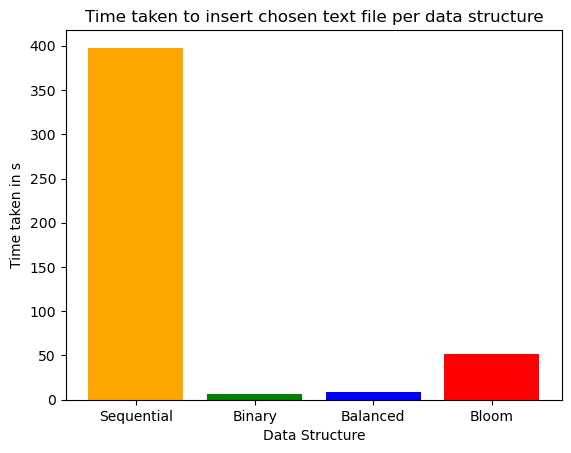

5149661

In [35]:
import timeit
import matplotlib.pyplot as plt

'''
    To use this TestClass:
    1. **ONLY INSERT PARAMETERS IF USING REAL DATA** Create an instance of the class with test_data
       and validation_data inserted as parameters,each having been passed through the txt_to_array
       function. Additionally, insert "real" as the test_type parameter. If doing synthetic tests,
       do not insert any parameters.
    2. Call all_test() with "insert" or "search" as the parameter. This will either run a search
       test or an insert test. The results will be shown as a graph.
    3. Feel gree to tweak and modify code to give better results. i.e. so that Sequential is not
       included in the graph as it skews the axis too much. I can provide code to do this if needed.
       Feel free to contact me with issues or help :).
    p.s. The dickens text takes very long to insert and other tests may take a while too.
'''
def txt_to_array(file_name : str) -> list:
    array = []
    with open(file_name, "r") as f:
        for line in f:
            for word in line.split():
                array.append(word)
    return array


def _helper(seq_times : list, bin_times : list, bal_times : list, blm_times : list, output, struct):
    if struct == "Sequential":
        seq_times.append(output)
    elif struct == "Binary":
        bin_times.append(output)
    elif struct == "Balanced":
        bal_times.append(output)
    elif struct == "Bloom":
        blm_times.append(output)
    else:
        raise Exception("Invalid data structure")


class TestClass:
    def __init__(self, test_data=None, validation_data=None, test_type="synthetic"):
        self.insert_data = test_data
        self.search_data = validation_data
        self.test_type = test_type
        self.gen = TestDataGenerator()
        self.sequential = SequentialSearchSet()
        self.binary = BinarySearchTreeSet()
        self.balanced = BalancedSearchTreeSet()
        self.bloom = BloomFilterSet()

    def all_test(self, test_func = "insert"):
        seq_times, bin_times, bal_times, blm_times = [], [], [], []
        struct_types = ["Sequential", "Binary", "Balanced", "Bloom"]

        if self.test_type == "synthetic":
            sizes = []
            for i in range(0, 10):
                sizes.append(5000 * i)
            for size in sizes:
                if size >= 35000 and "Sequential" in struct_types:
                    struct_types.remove("Sequential")
                print("Size: " + str(size))

                self.insert_data = self.gen.generateData(size)
                self.search_data = self.gen.generateData(int(size/10))
                if test_func.lower() == "insert":
                    for struct in struct_types:
                        tim = timeit.timeit(stmt=lambda: self.insert_test(struct), number=1)
                        _helper(seq_times, bin_times, bal_times, blm_times, tim, struct)
                elif test_func.lower() == "search":
                    for struct in struct_types:
                        tim = timeit.timeit(stmt=lambda: self.search_test(struct), setup=lambda: self.insert_test(struct), number=1)
                        _helper(seq_times, bin_times, bal_times, blm_times, tim, struct)
                else:
                    raise Exception("invalid test function")

            while len(seq_times) < len(sizes):
                seq_times.append(0)
            print("sizes: " + str(sizes) + " seq_times: " + str(seq_times))

            plt.plot(sizes, seq_times, color='orange', label="Sequential", marker='o', markersize=5)
            plt.plot(sizes, bin_times, color='green', label="Binary", marker='o', markersize=5)
            plt.plot(sizes, bal_times, color='blue', label="Balanced", marker='o', markersize=5)
            plt.plot(sizes, blm_times, color='red', label='Bloom', marker='o', markersize=5)

            plt.xlabel("Number of elements inserted")
            plt.ylabel("Time taken in s")
            plt.legend()
            plt.show()

        elif self.test_type == "real":
            print("real")
            if test_func == "insert":
                for struct in struct_types:
                    tim = timeit.timeit(stmt=lambda: self.insert_test(struct), number=1)
                    _helper(seq_times, bin_times, bal_times, blm_times, tim, struct)
            elif test_func == "search":
                for struct in struct_types:
                    tim = timeit.timeit(stmt=lambda: self.insert_test(struct), number=1)
                    _helper(seq_times, bin_times, bal_times, blm_times, tim, struct)
            else:
                raise Exception("invalid test function")

        values_in_order = seq_times + bin_times + bal_times + blm_times
        plt.bar(struct_types, values_in_order, color=['orange', 'green', 'blue', 'red'])
        plt.xlabel("Data Structure")
        plt.ylabel("Time taken in s")
        plt.title("Time taken to " + test_func + " chosen text file per data structure")
        plt.show()




    def insert_test(self, struct):
        print("inserting")
        if struct == "Sequential":
            for item in self.insert_data:
                self.sequential.insertElement(item)
        elif struct == "Binary":
            for item in self.insert_data:
                self.binary.insertElement(item)
        elif struct == "Balanced":
            for item in self.insert_data:
                self.balanced.insertElement(item)
        elif struct == "Bloom":
            for item in self.insert_data:
                self.bloom.insertElement(item)
        else:
            raise Exception("Invalid data structure")

    def search_test(self, struct):
        print("searching")
        if struct == "Sequential":
            for item in self.insert_data:
                self.sequential.searchElement(item)
        elif struct == "Binary":
            for item in self.insert_data:
                self.binary.searchElement(item)
        elif struct == "Balanced":
            for item in self.insert_data:
                self.balanced.searchElement(item)
        elif struct == "Bloom":
            for item in self.insert_data:
                self.bloom.searchElement(item)
        else:
            raise Exception("Invalid data structure")


te = TestClass(txt_to_array("test3-dickens.txt"), txt_to_array("test-search.txt"), "real")
te.all_test("insert")
len(txt_to_array("test3-dickens.txt"))


In [30]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON REAL DATA

def generic_test_insert(data_set, file_or_virtual, real_test=True):
    if data_set == BloomFilterSet:
        test_set = BloomFilterSet()
        test_set.create_bloom_filter()
    test_set = data_set()
    if real_test:
        with open(file_or_virtual, "r") as f:
            for line in f:
                for word in line.split():
                    test_set.insertElement(word)
    else:
        for item in file_or_virtual:
            test_set.insertElement(item)
    return test_set

def generic_test_search(inserted_set_var, file_or_virtual, real_test=True):
    if real_test:
        with open(file_or_virtual, "r") as f:
            for word in f:
                target = word.strip()
                inserted_set_var.searchElement(target)
    else:
        for item in file_or_virtual:
            inserted_set_var.searchElement(item)

def time_set(data_set):
    test_search_file = "test-search.txt"
    test_insert_file1 = "test1-mobydick.txt"
    test_insert_file2 = "test2-warpeace.txt"
    print(data_set.__name__)
    print("Real test1: ")
    stmt_insertion = 'test_set = generic_test_insert({}, "{}")'.format(data_set.__name__, test_insert_file1)
    setup_insertion = 'from __main__ import generic_test_insert, {}'.format(data_set.__name__)
    stmt_search = 'generic_test_search(a, "{}")'.format(test_search_file)
    setup_search = 'from __main__ import generic_test_search, generic_test_insert, {}; a={}'.format(data_set.__name__, stmt_insertion)
    print(timeit.timeit(stmt=stmt_insertion, setup=setup_insertion, number=1))
    print(timeit.timeit(stmt=stmt_search, setup=setup_search, number=1))

    print("Real test2: ")
    stmt_insertion = 'test_set = generic_test_insert({}, "{}")'.format(data_set.__name__, test_insert_file2)
    setup_insertion = 'from __main__ import generic_test_insert, {}'.format(data_set.__name__)
    stmt_search = 'generic_test_search(a, "{}")'.format(test_search_file)
    setup_search = 'from __main__ import generic_test_search, generic_test_insert, {}; a={}'.format(data_set.__name__, stmt_insertion)
    print(timeit.timeit(stmt=stmt_insertion, setup=setup_insertion, number=1))
    print(timeit.timeit(stmt=stmt_search, setup=setup_search, number=1))

    print("Virtual test: ")
    stmt_insertion = 'test_set = generic_test_insert({}, virtual_insert_data, False)'.format(data_set.__name__)
    setup_insertion = 'from __main__ import generic_test_insert, {}, TestDataGenerator; gen = TestDataGenerator(); virtual_insert_data = gen.generateData(10000)'.format(data_set.__name__)
    stmt_search = 'generic_test_search(a, virtual_search_data, False)'
    setup_search = 'from __main__ import generic_test_search, generic_test_insert, {}, TestDataGenerator; gen = TestDataGenerator(); virtual_insert_data = gen.generateData(10000);  a={}; virtual_search_data = gen.generateData(100000)'.format(data_set.__name__, stmt_insertion)
    print(timeit.timeit(stmt=stmt_insertion, setup=setup_insertion, number=1))
    print(timeit.timeit(stmt=stmt_search, setup=setup_search, number=1))



In [15]:

time_set(SequentialSearchSet)
time_set(BinarySearchTreeSet)
time_set(BalancedSearchTreeSet)
time_set(BloomFilterSet)

SequentialSearchSet
Real test1: 
5.541955890999816
0.027676323000378034
Real test2: 
10.226013012000294
0.026888431000770652
Virtual test: 
0.30610225399959745
5.558606085000065
BinarySearchTreeSet
Real test1: 
0.27476781499990466
0.0009067210003195214
Real test2: 
0.7586258020000969
0.0008745630002522375
Virtual test: 
0.016073077999863017
0.16499919799935014
BalancedSearchTreeSet
Real test1: 
0.4300085240001863
0.0009197010003845207
Real test2: 
1.0176584909995654
0.0008596629995736293
Virtual test: 
0.030448233999777585
0.1634859140003755
BloomFilterSet
Real test1: 
1.8740138540006228
0.004799777999323851
Real test2: 
5.038639905000309
0.004694278999522794
Virtual test: 
0.08277237899983447
0.40899218799950177


In [16]:
with open("test1-mobydick.txt", "r") as f:
    bf2 = BloomFilterSet()
    bf2.create_bloom_filter()
    conflict = 0
    total_num1 = 0
    for line in f:
        for word in line.split():
            total_num1 += 1
            bf2.insertElement(word)
exist = []
correct = []
with open("test-search.txt", "r") as f:
    for word in f:
        target = word.strip()
        if bf2.searchElement(target):
            if target not in exist:
                exist.append(target)
with open("test1-mobydick.txt", "r") as f:
    for line in f:
        for item in exist:
            if item not in correct:
                if line.find(item) != -1:
                    correct.append(item)
test1_accuracy = 1 - len(correct) / len(exist)

with open("test2-warpeace.txt", "r") as f:
    bf = BloomFilterSet()
    bf.create_bloom_filter()
    conflict = 0
    total_num2 = 0
    for line in f:
        for word in line.split():
            total_num2 += 1
            bf.insertElement(word)

exist = []
correct = []
with open("test-search.txt", "r") as f:
    for word in f:
        target = word.strip()
        if bf.searchElement(target):
            if target not in exist:
                exist.append(target)
with open("test2-warpeace.txt", "r") as f:
    for line in f:
        for item in exist:
            if item not in correct:
                if line.find(item) != -1:
                    correct.append(item)
test2_accuracy = 1 - len(correct) / len(exist)
real_sizes = [total_num1, total_num2]
real_accuracies = [test1_accuracy, test2_accuracy]
print(real_accuracies)

[0.026584867075664653, 0.010121457489878583]


In [17]:
def test_real_time(data_set):
    test_search_file = "test-search.txt"
    test_insert_file1 = "test1-mobydick.txt"
    test_insert_file2 = "test2-warpeace.txt"
    stmt_insertion1 = 'test_set = generic_test_insert({}, "{}")'.format(data_set.__name__, test_insert_file1)
    setup_insertion1 = 'from __main__ import generic_test_insert, {}'.format(data_set.__name__)
    stmt_search1 = 'generic_test_search(a, "{}")'.format(test_search_file)
    setup_search1 = 'from __main__ import generic_test_search, generic_test_insert, {}; a={}'.format(data_set.__name__, stmt_insertion1)
    stmt_insertion2 = 'test_set = generic_test_insert({}, "{}")'.format(data_set.__name__, test_insert_file2)
    setup_insertion2 = 'from __main__ import generic_test_insert, {}'.format(data_set.__name__)
    stmt_search2 = 'generic_test_search(a, "{}")'.format(test_search_file)
    setup_search2 = 'from __main__ import generic_test_search, generic_test_insert, {}; a={}'.format(data_set.__name__, stmt_insertion2)
    return [timeit.timeit(stmt=stmt_insertion1, setup=setup_insertion1, number=1), timeit.timeit(stmt=stmt_insertion2, setup=setup_insertion2, number=1)], [timeit.timeit(stmt=stmt_search1, setup=setup_search1, number=1), timeit.timeit(stmt=stmt_search2, setup=setup_search2, number=1)]

In [18]:
def test_bloom_filter_accuracy(insert_num, search_num):
    gen = TestDataGenerator()
    data_insert = gen.generateData(insert_num)
    data_search = gen.generateData(search_num)
    exist = []
    correct = []
    bf3 = BloomFilterSet()
    bf3.create_bloom_filter()
    for word in data_insert:
        bf3.insertElement(word)

    for word in data_search:
        if bf3.searchElement(word):
            if word not in exist:
                exist.append(word)
            if word in data_insert:
                if word not in correct:
                    correct.append(word)
    return 1 - len(correct) / len(exist)

In [19]:
import timeit
def test_time(data_set, insert_num, search_num):
    stmt_insertion = 'test_set = generic_test_insert({}, virtual_insert_data, False)'.format(data_set.__name__)
    setup_insertion = 'from __main__ import generic_test_insert, {}, TestDataGenerator; gen = TestDataGenerator(); virtual_insert_data = gen.generateData({})'.format(data_set.__name__, insert_num)
    stmt_search = 'generic_test_search(a, virtual_search_data, False)'
    setup_search = 'from __main__ import generic_test_search, generic_test_insert, {}, TestDataGenerator; gen = TestDataGenerator(); virtual_insert_data = gen.generateData({});  a={}; virtual_search_data = gen.generateData({})'.format(data_set.__name__, insert_num, stmt_insertion, search_num)
    return timeit.timeit(stmt=stmt_insertion, setup=setup_insertion, number=1), timeit.timeit(stmt=stmt_search, setup=setup_search, number=1)


In [20]:
insert = 10000
inserts = []
accuracies = []
insert_times = []
search_times = []
count = 1
while count <= 50:
    cur_num = insert * count
    cur_acc = test_bloom_filter_accuracy(insert*count, insert//10*count)
    insert_time, search_time = test_time(BloomFilterSet, insert*count, insert//10*count)
    inserts.append(cur_num)
    accuracies.append(cur_acc)
    insert_times.append(insert_time)
    search_times.append(search_time)
    count += 5

inserts.sort()
accuracies.sort()
insert_times.sort()
search_times.sort()

In [21]:
real_inserts, real_searchs = test_real_time(BloomFilterSet)
print(real_searchs)
print(real_inserts)

[0.004627377999895543, 0.0046401810004681465]
[2.680406614000276, 4.842172437000045]


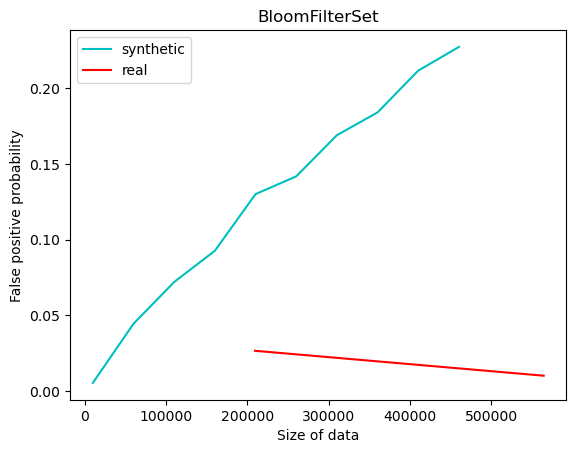

In [22]:
import matplotlib.pyplot as plt
plt.plot(inserts, accuracies, color='c', label='synthetic')
plt.plot(real_sizes, real_accuracies, color='r', label='real')
plt.title("BloomFilterSet")
plt.xlabel("Size of data")
plt.ylabel("False positive probability")
plt.legend()

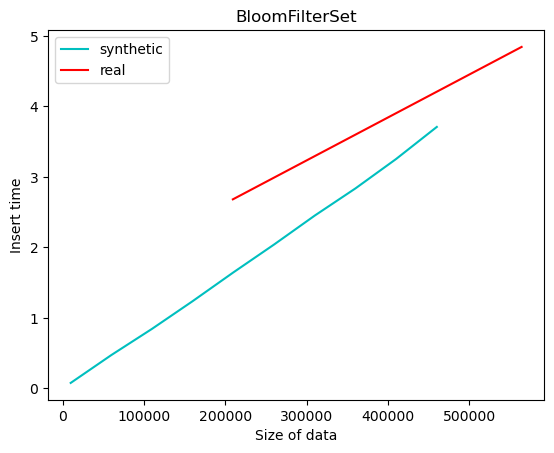

In [23]:
plt.plot(inserts, insert_times, color='c', label='synthetic')
plt.plot(real_sizes, real_inserts, color='r', label='real')
plt.title("BloomFilterSet")
plt.xlabel("Size of data")
plt.ylabel("Insert time")
plt.legend()

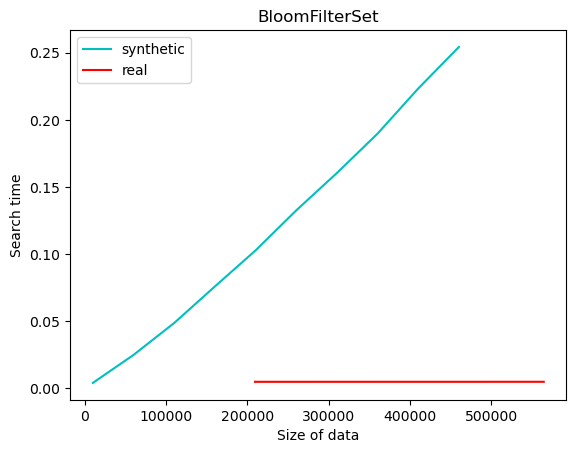

In [24]:
plt.plot(inserts, search_times, color='c', label='synthetic')
plt.plot(real_sizes, real_searchs, color='r', label='real')
plt.title("BloomFilterSet")
plt.xlabel("Size of data")
plt.ylabel("Search time")
plt.legend()